#Grupo 9 Práctica 2

Notebook de la práctica 2 realizado por Alejandro García Berrocal (100451059) y Lucas Gallego Bravo (100429005)
GitHub: https://github.com/AlejandroGB-9/Grupo9-Practica2

#Prerequisitos:

##Librerías e imports necesarios

In [2]:
!pip3 install numpy
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install scikit-optimize
!pip3 install skopt
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install statsmodels
!pip3 install lightgbm



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\aalex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import ensemble, tree, linear_model
import time
from scipy.stats import loguniform, randint, uniform
from sklearn import metrics
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, VarianceThreshold
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.pipeline import Pipeline
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix, make_scorer
from sklearn.impute import SimpleImputer
from skopt.space import Integer, Real
from sklearn.model_selection import train_test_split

##Extracción de datos

In [3]:

datos = pd.read_pickle('./attrition_available_9.pkl')


#EDA

          hrs  absences  JobInvolvement  PerformanceRating  \
1         NaN      13.0             2.0                4.0   
6    6.450877      17.0             3.0                4.0   
13        NaN      14.0             2.0                3.0   
28  10.713066       6.0             2.0                3.0   
30        NaN      11.0             NaN                3.0   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age Attrition  \
1                       3.0              2.0              4.0  31.0       Yes   
6                       NaN              3.0              1.0  28.0       Yes   
13                      1.0              2.0              2.0  47.0       Yes   
28                      4.0              3.0              1.0   NaN       Yes   
30                      1.0              NaN              3.0  26.0       Yes   

       BusinessTravel  ... NumCompaniesWorked  Over18  PercentSalaryHike  \
1   Travel_Frequently  ...                0.0       Y           

C:\Users\aalex\AppData\Local\Temp\ipykernel_18580\2333249129.py:43: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))



                         hrs  absences  JobInvolvement  PerformanceRating  \
hrs                      NaN  0.368024        0.006454           0.046941   
absences                 NaN       NaN        0.013140           0.020402   
JobInvolvement           NaN       NaN             NaN           0.017793   
PerformanceRating        NaN       NaN             NaN                NaN   
EnvironmentSatisfaction  NaN       NaN             NaN                NaN   
JobSatisfaction          NaN       NaN             NaN                NaN   
WorkLifeBalance          NaN       NaN             NaN                NaN   
Age                      NaN       NaN             NaN                NaN   
DistanceFromHome         NaN       NaN             NaN                NaN   
Education                NaN       NaN             NaN                NaN   
EmployeeCount            NaN       NaN             NaN                NaN   
EmployeeID               NaN       NaN             NaN                NaN  

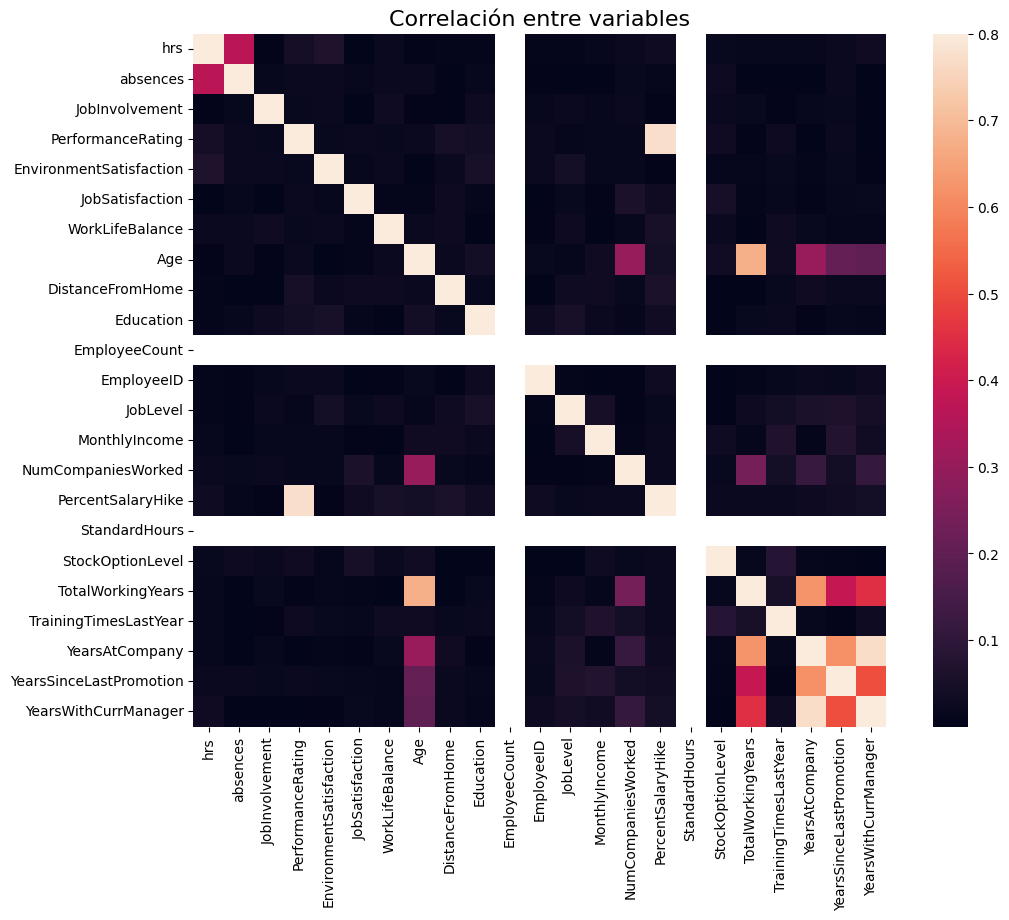

In [4]:

#------------------------------------------
#Cuantos datos faltantes o NaN hay

print(datos.head())
print()
print("Información del dataset:\n ", datos.info())
print()
print(datos['Attrition'].value_counts(normalize=True))
print()
print("Suma de datos que son nulos o NA:\n", datos.isnull().sum())
print()
print(f"Cuantos valores NaN|missing values contiene el target: {datos['Attrition'].isnull().sum()}")
print()
print(f"Tiene el mismo valor en todas las filas el atributo Over18: {datos['Over18'].value_counts()/len(datos)}")
print()

#------------------------------------------
#Obtener los datos numéricos y categoricos

cols_cat = datos.select_dtypes(include=['object']).columns
cols_num = datos.select_dtypes(include=['int64', 'float64']).columns

print(f"Los valores categoricos son: {cols_cat}")
print()
print(f"Los valores numericos son: {cols_num}")
    
#------------------------------------------
#Estudio de la correlación entre las variables numéricas

X = datos.select_dtypes(include=['int64', 'float64'])
df = pd.DataFrame(X)
print()
print(df)

corr_matrix = df.corr().abs()
print()
print(corr_matrix)

f, ax = plt.subplots(figsize=(12, 9))
plt.title('Correlación entre variables', y=1, size=16)
sns.heatmap(corr_matrix, vmax=.8, square=True)

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print()
print(upper)

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print()
print("Estos son los atributos a eliminar:\n")
print(to_drop)

#------------------------------------------
#Drop the los valores que no se van a utilizar o no pertenecen al dataset
cols_cat = cols_cat.drop('Over18')
cols_cat = cols_cat.drop('Attrition')
cols_num = cols_num.drop('EmployeeCount')
cols_num = cols_num.drop('StandardHours')
print(cols_cat)

col_cat = []
col_num = []
for i in cols_cat:
    col_cat.append(str(i))
for i in cols_num:
    col_num.append(str(i))

# Define the transformers
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, col_num),
    ('cat', categorical_transformer, col_cat),
    
])

print()
print("Preprocesador para usar en los modelos debido a la cantidad de missing values | NaN:\n")
print(preprocessor)

Sabemos que se trata de un problema de clasificación desbalanceado, por lo que se debe tener en cuenta a la hora de evaluar los modelos. Además, se debe tener en cuenta que el objetivo es predecir si un empleado se va a ir de la empresa o no, por lo que se debe tener en cuenta que la métrica a utilizar es la precisión. Missing values, se debe imputar los datos, y se debe utilizar una partición estratificada. 

#Construcción de modelos

##Extracción del conjunto de datos train/test

In [5]:
#------------------------------------------
#Se realizará la exrtacción de los datos de entrenamiento y test con el preprocesador obtenido en el EDA
datos = pd.read_pickle('./attrition_available_9.pkl')
target = datos['Attrition']
datos.drop(columns=['Attrition','Over18','EmployeeCount','StandardHours'], inplace=True)
target = target.replace({'Yes': 1, 'No': 0})
original_columns = pd.get_dummies(datos).columns
data = pd.DataFrame(preprocessor.fit_transform(datos))


#Se reparte el dataset en X y y
ds = data.T
X = [] 
y = target.T.tolist()
for i in ds.columns:
    X.append(ds[i].tolist())

#------------------------------------------
#Obtenemos los conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)


##Modelo 1: Regresión Logística

In [42]:
#--------------------------------------
# Logistic Regression
#--------------------------------------

inicio = time.time()
scaler = StandardScaler()
clf = LogisticRegression(random_state=9, class_weight='balanced')
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
pipe_clf.fit(X_train, y_train)
y_pred = pipe_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio
print(f"El tiempo tardado es de {tiempo} segundos.\n")
print(f"El f1 es de {f1}\n")
print(f"El balanced accuracy es de {bal_acc}\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Logistic Regression
#--------------------------------------

El tiempo tardado es de 0.05238485336303711 segundos.

El f1 es de 0.45892351274787535

El balanced accuracy es de 0.7136039991336127

La matriz de confusión es: 
[[912 305]
 [ 77 162]]



In [6]:
#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

param = { 'clf__class_weight': ['balanced', None],
           'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LogisticRegression()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param_grid=param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {tiempo} segundos para f1.\n")
print(f"El f1 es de {clf.best_score_} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------


El tiempo tardado es de 2.5637295246124268 segundos para f1.

El f1 es de 0.34835224434823775 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=9))])

El tiempo tardado es de 0.041588354110717776 segundos para balanced accuracy.

El balanced accuracy es de 0.5032053574627955 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=9))])

El tiempo tardado es de 0.004952931404113769 segundos para la matriz de confusión.

La matriz de confusión es: 
[[726 491]
 [ 95 144]]



In [38]:
#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

param = { 'clf__class_weight': ['balanced', None],
           'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LogisticRegression()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

C:\Users\aalex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



El tiempo tardado es de 0.034300732612609866 segundos para f1.

El f1 es de 0.34835224434823775 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=9))])

El tiempo tardado es de 0.031600213050842284 segundos para balanced accuracy.

El balanced accuracy es de 0.5032053574627955 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=9))])

El tiempo tardado es de 0.0051002979278564455 segundos para la matriz de confusión.

La matriz de confusión es: 
[[726 491]
 [ 95 144]]



In [39]:
#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

param = { 'clf__class_weight': ['balanced', None],
           'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = StandardScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LogisticRegression(random_state=9)
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

KeyError: 'mean_test_score'

##Modelo 2: Boosting

##Modelo 2.1: Hist Gradient Boosting

In [12]:
#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

param = { 'clf__class_weight': ['balanced', None],
         'clf__max_depth': [ 10,15,20 ],
         'clf__learning_rate': [10, 1, 0.1],
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.best_score_} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {max(clf.cv_results_['mean_test_balanced_accuracy'])} con estimadores {clf.cv_results_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------


El tiempo tardado es de 0.17457726001739501 segundos para f1.

El f1 es de 0.700213253573174 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                max_depth=10,
                                                random_state=9))])

El tiempo tardado es de 0.2054995059967041 segundos para balanced accuracy.

El balanced accuracy es de 0.8077302862789525 con estimadores {'mean_fit_time': array([0.17457726, 0.20549951, 0.20270061, 0.96258802, 0.88862989,
       0.89946518, 1.10192862, 1.10618725, 1.07007663, 0.14708829,
       0.14228919, 0.13961198, 0.71682708, 0.77521858, 0.78280358,
       1.0082958 , 1.00675488, 0.85685234]), 'std_fit_time': array([0.04088366, 0.02576965, 0.04679722, 0.13156993, 0.07341315,
       0.09983067, 0.06077421, 0.07475497, 0.05589972, 0.00787632,
       0.00892101, 0.01109179, 0.18669872, 0.03785213, 0.05744627,
       0.

In [41]:
#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': randint(low=10, high=15),
         'clf__learning_rate': uniform( 0.1, 1),
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = RobustScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------


El tiempo tardado es de 1.1412015676498413 segundos para f1.

El f1 es de 0.6796621292288814 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.7019425384697481,
                                                max_depth=11,
                                                random_state=9))])

El tiempo tardado es de 1.0314004182815553 segundos para balanced accuracy.

El balanced accuracy es de 0.7825089996223742 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.7019425384697481,
                                                max_depth=11,
                                                random_state=9))])

El tiempo tardado es de 0.01390061378479004 s

In [43]:
#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': Integer(low=10, high=20, name='clf__max_depth'),
         'clf__learning_rate': Real(low=0.1, high=1, prior='log-uniform', name='clf__learning_rate'),
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = RobustScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning
#--------------------------------------

KeyError: 'mean_test_score'

##Modelo 2.2: LightGBM

In [47]:
#--------------------------------------
# Boosting with LightGBM with Hyperparameter Tuning
#--------------------------------------

param = {'clf__n_estimators': [1500, 2000, 2500],
              'clf__learning_rate': [0.1, 1],
              'clf__max_depth': [15, 20, 25],
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with Hyperparameter Tuning
#--------------------------------------


El tiempo tardado es de 1.7130990505218506 segundos para f1.

El f1 es de 0.7453029132829394 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', max_depth=15,
                                n_estimators=1500, random_state=9))])

El tiempo tardado es de 2.140000081062317 segundos para balanced accuracy.

El balanced accuracy es de 0.8124738745648343 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', max_depth=15,
                                n_estimators=1500, random_state=9))])

El tiempo tardado es de 0.041500282287597653 segundos para la matriz de confusión.

La matriz de confusión es: 
[[1200   17]
 [  97  142]]



In [49]:
#--------------------------------------
# Boosting with LightGBM with Hyperparameter Tuning
#--------------------------------------

param = {'clf__n_estimators': randint(2000, 3000),
              'clf__learning_rate': loguniform(0.001, 1),
              'clf__max_depth': randint(10, 20),
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with Hyperparameter Tuning
#--------------------------------------


El tiempo tardado es de 3.8995088577270507 segundos para f1.

El f1 es de 0.7194826166143995 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.016989611863207, max_depth=19,
                                n_estimators=2413, random_state=9))])

El tiempo tardado es de 1.3541990756988525 segundos para balanced accuracy.

El balanced accuracy es de 0.7668835258673679 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.016989611863207, max_depth=19,
                                n_estimators=2413, random_state=9))])

El tiempo tardado es de 0.08319206237792968 segundos para la matriz de confusión.

La matriz de confusión es: 
[[1197   20]
 [  95  144]]



In [51]:
#--------------------------------------
# Boosting with LightGBM with Hyperparameter Tuning
#--------------------------------------

param = {'clf__n_estimators': Integer(2000, 3000),
              'clf__learning_rate': Real(0.1, 1, prior='log-uniform'),
              'clf__max_depth': Integer(10, 30),
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with Hyperparameter Tuning
#--------------------------------------

KeyError: 'mean_test_score'

#Modelos con atributos de tipo filtro

##Datos con atributos de tipo filtro

In [52]:
#------------------------------------------
#Conjuntos para f_classif
selector_f_classif = SelectKBest(f_classif, k=10)
Z_train = selector_f_classif.fit_transform(X_train, y_train)
Z_test = selector_f_classif.fit_transform(X_test, y_test)

#------------------------------------------
#Conjuntos para mutual_info_classif
selector_mutual_info_classif = SelectKBest(mutual_info_classif, k=10)
W_train = selector_mutual_info_classif.fit_transform(X_train, y_train)
W_test = selector_mutual_info_classif.fit_transform(X_test, y_test)

#------------------------------------------
#Conjuntos para chi2
selector_chi2_classif = SelectKBest(chi2, k=10)
V_train = selector_chi2_classif.fit_transform(X_train, y_train)
V_test = selector_chi2_classif.fit_transform(X_test, y_test)


##Modelos con atributos de tipo filtro f_classif

In [54]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = { 'clf__class_weight': ['balanced', None],
         'clf__max_depth': [10, 15, 20],
         'clf__learning_rate': [10, 1, 0.1],
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------


El tiempo tardado es de 0.06969897747039795 segundos para f1.

El f1 es de 0.16324848416998422 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=1, max_depth=15,
                                                random_state=9))])

El tiempo tardado es de 0.07939953804016113 segundos para balanced accuracy.

El balanced accuracy es de 0.44614738983387214 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=1, max_depth=15,
                                                random_state=9))])

El tiempo tardado es de 0.009900903701782227 segundos para la matriz de confusión.

La matriz de confusión es: 
[[921 296]
 [153  86]]



In [55]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': randint(low=10, high=20),
         'clf__learning_rate': uniform(0.01, 1),
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = StandardScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------


El tiempo tardado es de 0.41799843311309814 segundos para f1.

El f1 es de 0.5943381039076673 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.34855434505373517,
                                                max_depth=18,
                                                random_state=9))])

El tiempo tardado es de 0.409199857711792 segundos para balanced accuracy.

El balanced accuracy es de 0.741458559012991 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.34855434505373517,
                                                max_depth=18,
                                                random_state=9))])

El tiempo tardado es de 0.00780065059661

In [15]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': Integer(low=20, high=70, name='clf__max_depth'),
         'clf__learning_rate': Real(low=0.01, high=10, prior='log-uniform', name='clf__learning_rate'),
         'clf__random_state': [9]}
inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = RobustScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

El tiempo tardado es de 56.82216715812683 segundos para f1.

El f1 es de 0.6552721493102249 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.44960121721995616,
                                                max_depth=23,
                                                random_state=9))])

El tiempo tardado es de 45.08875799179077 segundos para balanced accuracy.

El balanced accuracy es de 0.7905815523590587 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.14547669415656247,
                                                max_depth=70,
                                                random_state=9))])

El tiempo tardado es de 0.0050013065338134766 

In [56]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': [2000, 3000],
              'clf__learning_rate': [0.1, 1, 10],
              'clf__max_depth': [10, 15, 20],
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------


El tiempo tardado es de 1.698399019241333 segundos para f1.

El f1 es de 0.6393261146673831 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', learning_rate=1,
                                max_depth=15, n_estimators=2000,
                                random_state=9))])

El tiempo tardado es de 2.0028002977371218 segundos para balanced accuracy.

El balanced accuracy es de 0.7635103385401593 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', learning_rate=1,
                                max_depth=15, n_estimators=2000,
                                random_state=9))])

El tiempo tardado es de 0.04970006942749024 segundos para la matriz de confusión.

La matriz de confusión es: 
[[1060  157]
 [ 179   60]]



In [57]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': randint(1000, 3000),
              'clf__learning_rate': loguniform(0.01, 1),
              'clf__max_depth': randint(10, 20),
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = StandardScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------


El tiempo tardado es de 1.283197784423828 segundos para f1.

El f1 es de 0.6348519144501393 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.013932856305199344,
                                max_depth=18, n_estimators=1447,
                                random_state=9))])

El tiempo tardado es de 1.2130008459091186 segundos para balanced accuracy.

El balanced accuracy es de 0.766889753592269 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.013932856305199344,
                                max_depth=18, n_estimators=1447,
                                random_state=9))])

El tiempo tardado es de 0.04600105285644531 segundos para la matriz de confusión.

La matriz de confusión es: 
[[743 474]
 [115 1

In [19]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': Integer(1000, 3000),
              'clf__learning_rate': Real(0.1, 1, prior='log-uniform'),
              'clf__max_depth': Integer(10, 20),
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = RobustScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

El tiempo tardado es de 87.57641267776489 segundos para f1.

El f1 es de 0.6468576059269474 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 LGBMClassifier(learning_rate=0.39749997288213296, max_depth=15,
                                n_estimators=2287, random_state=9))])

El tiempo tardado es de 88.69542145729065 segundos para balanced accuracy.

El balanced accuracy es de 0.7639676154859658 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 LGBMClassifier(learning_rate=0.8055664470661971, max_depth=11,
                                n_estimators=2707, random_state=9))])

El tiempo tardado es de 0.019997835159301758 segundos para confusión matrix.

El confusion matrix es de: 
[[998 219]
 [159  80]]



##Modelos con atributos de tipo filtro mutual_info_classif

In [58]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = { 'clf__class_weight': ['balanced', None],
         'clf__max_depth': [10, 15, 20],
         'clf__learning_rate': [10, 1, 0.1],
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(W_train, y_train)
y_pred = clf.predict(W_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------


El tiempo tardado es de 0.06609985828399659 segundos para f1.

El f1 es de 0.18288272473793477 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=1, max_depth=20,
                                                random_state=9))])

El tiempo tardado es de 0.07529914379119873 segundos para balanced accuracy.

El balanced accuracy es de 0.4408849881337291 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=1, max_depth=20,
                                                random_state=9))])

El tiempo tardado es de 0.01119999885559082 segundos para la matriz de confusión.

La matriz de confusión es: 
[[948 269]
 [129 110]]



In [59]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': randint(low=10, high=20),
         'clf__learning_rate': uniform(0.01, 1),
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = RobustScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(W_train, y_train)
y_pred = clf.predict(W_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------


El tiempo tardado es de 0.42810032367706297 segundos para f1.

El f1 es de 0.60436365726854 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.18832954691490833,
                                                max_depth=12,
                                                random_state=9))])

El tiempo tardado es de 0.4078993558883667 segundos para balanced accuracy.

El balanced accuracy es de 0.725961817413787 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.18832954691490833,
                                                max_depth=12,
                                                random_state=9))])

El tiempo tardado es de 0.009299945831298829 

In [23]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': Integer(low=10, high=20, name='clf__max_depth'),
         'clf__learning_rate': Real(low=0.01, high=1, prior='log-uniform', name='clf__learning_rate'),
         'clf__random_state': [9]}
inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(W_train, y_train)
y_pred = clf.predict(W_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

El tiempo tardado es de 48.555877923965454 segundos para f1.

El f1 es de 0.6274116904475093 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.3863977776559153,
                                                max_depth=10,
                                                random_state=9))])

El tiempo tardado es de 49.676308393478394 segundos para balanced accuracy.

El balanced accuracy es de 0.7708269591750668 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.15998885444643884,
                                                max_depth=10,
                                                random_state=9))])

El tiempo tardado es de 0.003997087478637695 segundos para confus

In [60]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': [1000, 1500, 2000],
              'clf__learning_rate': [0.01, 0.1, 1],
              'clf__max_depth': [10, 15, 20],
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(W_train, y_train)
y_pred = clf.predict(W_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------


El tiempo tardado es de 0.9838987827301026 segundos para f1.

El f1 es de 0.5841206185715399 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', learning_rate=1,
                                max_depth=10, n_estimators=2000,
                                random_state=9))])

El tiempo tardado es de 1.3599993705749511 segundos para balanced accuracy.

El balanced accuracy es de 0.7686857243662363 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', learning_rate=1,
                                max_depth=10, n_estimators=2000,
                                random_state=9))])

El tiempo tardado es de 0.028300762176513672 segundos para la matriz de confusión.

La matriz de confusión es: 
[[959 258]
 [136 103]]



In [62]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': randint(1000, 3000),
              'clf__learning_rate': loguniform(0.01, 1),
              'clf__max_depth': randint(10, 20),
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = StandardScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(W_train, y_train)
y_pred = clf.predict(W_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------


El tiempo tardado es de 1.5378986835479735 segundos para f1.

El f1 es de 0.630546044207721 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.7487246949526352, max_depth=18,
                                n_estimators=1021, random_state=9))])

El tiempo tardado es de 2.3376986503601076 segundos para balanced accuracy.

El balanced accuracy es de 0.7622686783510156 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.7487246949526352, max_depth=18,
                                n_estimators=1021, random_state=9))])

El tiempo tardado es de 0.0657999038696289 segundos para la matriz de confusión.

La matriz de confusión es: 
[[951 266]
 [126 113]]



In [27]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': Integer(500, 2000),
              'clf__learning_rate': Real(0.01, 1, prior='log-uniform'),
              'clf__max_depth': Integer(10, 20),
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = StandardScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(W_train, y_train)
y_pred = clf.predict(W_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

El tiempo tardado es de 87.86925411224365 segundos para f1.

El f1 es de 0.6446878173266519 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(learning_rate=0.1064421287802047, max_depth=10,
                                n_estimators=2000, random_state=9))])

El tiempo tardado es de 82.7635395526886 segundos para balanced accuracy.

El balanced accuracy es de 0.7622711160358662 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(learning_rate=0.10515379242584993, max_depth=10,
                                n_estimators=2000, random_state=9))])

El tiempo tardado es de 0.020999908447265625 segundos para confusión matrix.

El confusion matrix es de: 
[[1217    0]
 [ 239    0]]



##Modelos con atributos de tipo filtro chi2

In [64]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = { 'clf__class_weight': ['balanced', None],
         'clf__max_depth': [10, 15, 20],
         'clf__learning_rate': [10, 1, 0.1],
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(V_train, y_train)
y_pred = clf.predict(V_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------


El tiempo tardado es de 0.07749927043914795 segundos para f1.

El f1 es de 0.17932534407560896 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                max_depth=20,
                                                random_state=9))])

El tiempo tardado es de 0.07029943466186524 segundos para balanced accuracy.

El balanced accuracy es de 0.45552861755877316 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                max_depth=20,
                                                random_state=9))])

El tiempo tardado es de 0.0060997486114501955 segundos para la matriz de confusión.

La matriz de confusión es: 
[[1048  169]
 [ 128  111]]



In [65]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': randint(low=10, high=20),
         'clf__learning_rate': uniform(0.1, 1),
         'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = StandardScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(V_train, y_train)
y_pred = clf.predict(V_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------


El tiempo tardado es de 0.41870009899139404 segundos para f1.

El f1 es de 0.46095000155579047 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.36804911875549273,
                                                max_depth=18,
                                                random_state=9))])

El tiempo tardado es de 0.4002997398376465 segundos para balanced accuracy.

El balanced accuracy es de 0.6451587062043644 con estimadores Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.36804911875549273,
                                                max_depth=18,
                                                random_state=9))])

El tiempo tardado es de 0.00769956111

In [31]:
#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

param = {'clf__class_weight': ['balanced', None],
         'clf__max_depth': Integer(low=10, high=20, name='clf__max_depth'),
         'clf__learning_rate': Real(low=0.1, high=1, prior='log-uniform', name='clf__learning_rate'),
         'clf__random_state': [9]}
inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = HistGradientBoostingClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(V_train, y_train)
y_pred = clf.predict(V_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with Hyperparameter Tuning with filter
#--------------------------------------

C:\Users\aalex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\aalex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\aalex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\aalex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python

El tiempo tardado es de 53.45200276374817 segundos para f1.

El f1 es de 0.5435105505836598 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.1498639351806163,
                                                max_depth=14,
                                                random_state=9))])

El tiempo tardado es de 49.08764576911926 segundos para balanced accuracy.

El balanced accuracy es de 0.7294816792909457 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.1510240352392383,
                                                max_depth=10,
                                                random_state=9))])

El tiempo tardado es de 0.0050008296966552734 segundos para confusió

In [66]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': [250, 500, 1000],
              'clf__learning_rate': [0.1, 1, 10],
              'clf__max_depth': [10, 15, 20],
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = None
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = GridSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(V_train, y_train)
y_pred = clf.predict(V_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------


El tiempo tardado es de 0.19659819602966308 segundos para f1.

El f1 es de 0.551422285644535 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', max_depth=20,
                                n_estimators=500, random_state=9))])

El tiempo tardado es de 0.45260009765625 segundos para balanced accuracy.

El balanced accuracy es de 0.7222746769507682 con estimadores Pipeline(steps=[('scaler', None),
                ('clf',
                 LGBMClassifier(class_weight='balanced', max_depth=20,
                                n_estimators=500, random_state=9))])

El tiempo tardado es de 0.009200310707092286 segundos para la matriz de confusión.

La matriz de confusión es: 
[[1152   65]
 [ 149   90]]



In [67]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': randint(1000, 3000),
              'clf__learning_rate': loguniform(0.1, 1),
              'clf__max_depth': randint(10, 20),
              'clf__class_weight': ['balanced', None],
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = RobustScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = RandomizedSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(V_train, y_train)
y_pred = clf.predict(V_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------


El tiempo tardado es de 1.4872995615005493 segundos para f1.

El f1 es de 0.5501832381582921 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.1334406648884264, max_depth=17,
                                n_estimators=2945, random_state=9))])

El tiempo tardado es de 1.0068983078002929 segundos para balanced accuracy.

El balanced accuracy es de 0.7121086266824334 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.1334406648884264, max_depth=17,
                                n_estimators=2945, random_state=9))])

El tiempo tardado es de 0.0468998908996582 segundos para la matriz de confusión.

La matriz de confusión es: 
[[1163   54]
 [ 162   77]]



In [34]:
#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

param = {'clf__n_estimators': Integer(1000, 3000),
              'clf__learning_rate': Real(0.01, 1, prior='log-uniform'),
              'clf__max_depth': Integer(10, 20),
              'clf__random_state': [9]}

inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
scaler = RobustScaler()
scoring = {
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}
clf = LGBMClassifier()
pipe_clf = Pipeline([('scaler', scaler), ('clf', clf)])
inicio = time.time()
clf = BayesSearchCV(pipe_clf, param, cv=inner, scoring=scoring, refit='f1', n_jobs=-1).fit(V_train, y_train)
y_pred = clf.predict(V_test)
cm = confusion_matrix(y_test, y_pred)
final = time.time()
tiempo = final - inicio

print(f"\nEl tiempo tardado es de {clf.cv_results_['mean_fit_time'][0]} segundos para f1.\n")
print(f"El f1 es de {clf.cv_results_['mean_test_f1'][0]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_fit_time'][1]} segundos para balanced accuracy.\n")
print(f"El balanced accuracy es de {clf.cv_results_['mean_test_balanced_accuracy'][1]} con estimadores {clf.best_estimator_}\n")
print(f"El tiempo tardado es de {clf.cv_results_['mean_score_time'][0]} segundos para la matriz de confusión.\n")
print(f"La matriz de confusión es: \n{cm}\n")

#--------------------------------------
# Boosting with LightGBM with filter
#--------------------------------------

El tiempo tardado es de 118.37450170516968 segundos para f1.

El f1 es de 0.552434950967011 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 LGBMClassifier(learning_rate=0.10427240960889096, max_depth=10,
                                n_estimators=1897, random_state=9))])

El tiempo tardado es de 122.33937406539917 segundos para balanced accuracy.

El balanced accuracy es de 0.7081950054852216 con estimadores Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 LGBMClassifier(learning_rate=0.03696411754414609, max_depth=16,
                                n_estimators=3000, random_state=9))])

El tiempo tardado es de 0.040998220443725586 segundos para confusión matrix.

El confusion matrix es de: 
[[1167   50]
 [ 166   73]]



#Conclusiones y comparación de modelos

#Modelo final